<h1 align="center">02 — Exploratory Data Analysis (EDA)</h1>


## Purpose
This notebook explores the temporal and statistical behavior of the weekly pharmaceutical sales dataset.  
It aims to uncover underlying patterns, seasonality, and correlations among different ATC therapeutic categories.

## Objectives
1. Provide an overall time series visualization of all ATC categories.  
2. Analyze individual ATC trends separately to identify unique temporal patterns.  
3. Compute and visualize correlations among ATC categories to detect potential interdependencies.  

## Expected Outcome
- Line plots showing weekly trends for each ATC category.  
- Analytical observations on stability, seasonality, and variability.  
- Correlation heatmap and insights on shared or independent behavior between categories.


## 1. Combined Overview of All ATC Categories

The following plot shows all ATC therapeutic classes on a single chart.  
Although visually dense, it provides an overall understanding of magnitude differences and general temporal behavior.


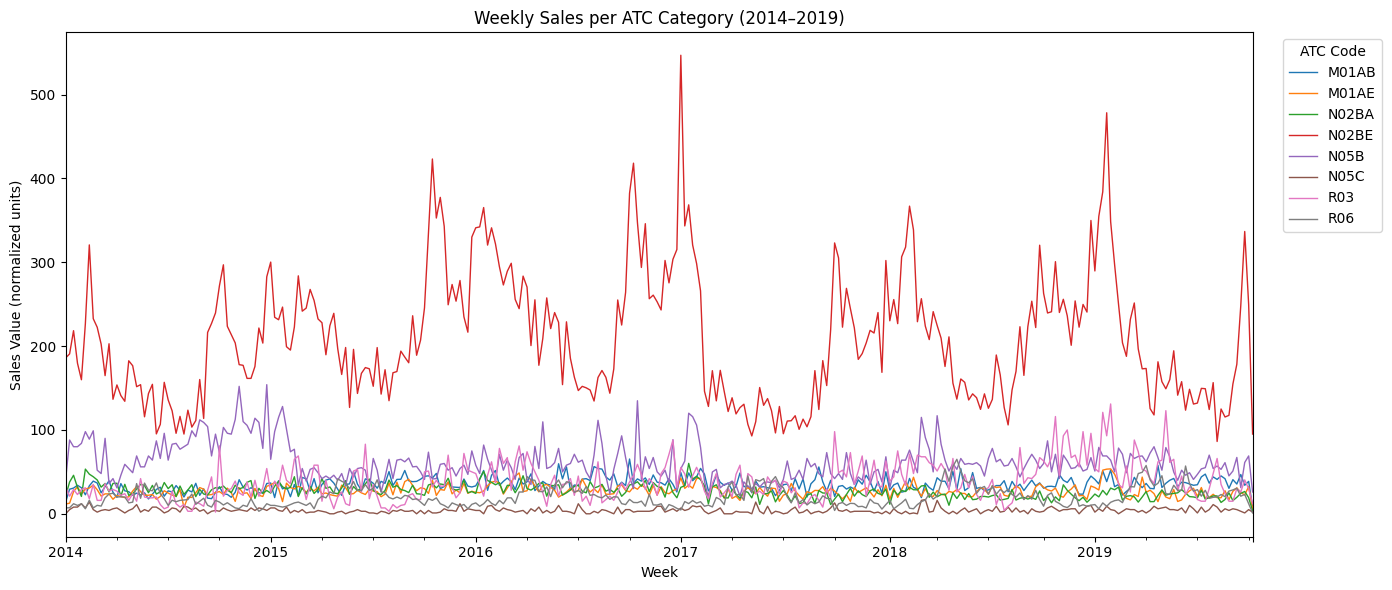

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read and prepare the dataset
path = "../data/raw/pharma_sales.csv"
df = pd.read_csv(path)
df["datum"] = pd.to_datetime(df["datum"], errors="coerce")
df = df.set_index("datum").sort_index()

plt.figure(figsize=(14, 6))
df.plot(ax=plt.gca(), linewidth=1)
plt.title("Weekly Sales per ATC Category (2014–2019)")
plt.xlabel("Week")
plt.ylabel("Sales Value (normalized units)")
plt.legend(title="ATC Code", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

**Interpretation**

- The `N02BE` class dominates the dataset with significantly higher sales volumes compared to other ATC categories.  
- Periodic peaks suggest possible seasonal demand fluctuations (e.g., cold/flu seasons, analgesic use patterns).  
- Other categories show relatively stable, low-intensity movements with minor week-to-week variability.  
- Overall, the dataset exhibits consistent weekly data across five years, suitable for time series modeling.


## 2. ATC Code: M01AB

The chart below shows the weekly sales pattern for M01AB.


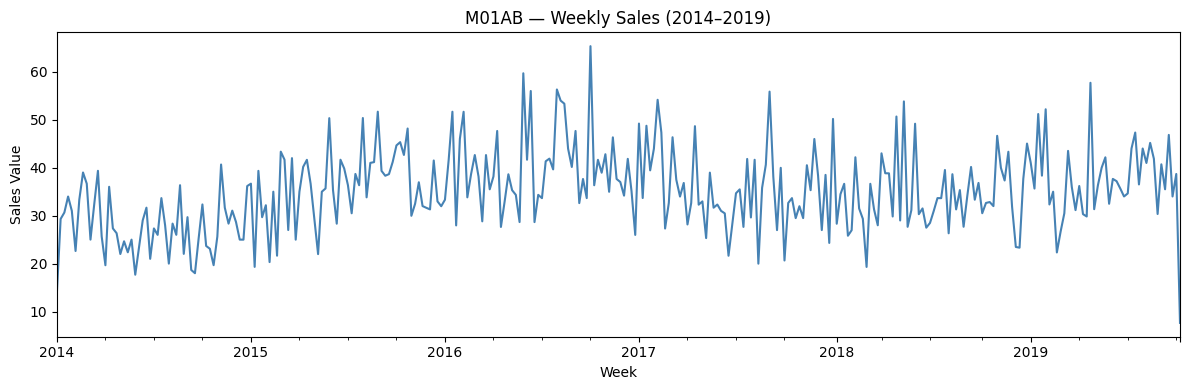

In [12]:
plt.figure(figsize=(12, 4))
df["M01AB"].plot(color="steelblue")
plt.title("M01AB — Weekly Sales (2014–2019)")
plt.xlabel("Week")
plt.ylabel("Sales Value")
plt.tight_layout()
plt.show()

**Insights**

- The series is relatively stable over time, with minor periodic increases.  
- Variability is low, indicating consistent weekly demand levels.  
- No clear upward or downward long-term trend is observed.


## 3. ATC Code: M01AE

The chart below isolates the time series for M01AE.


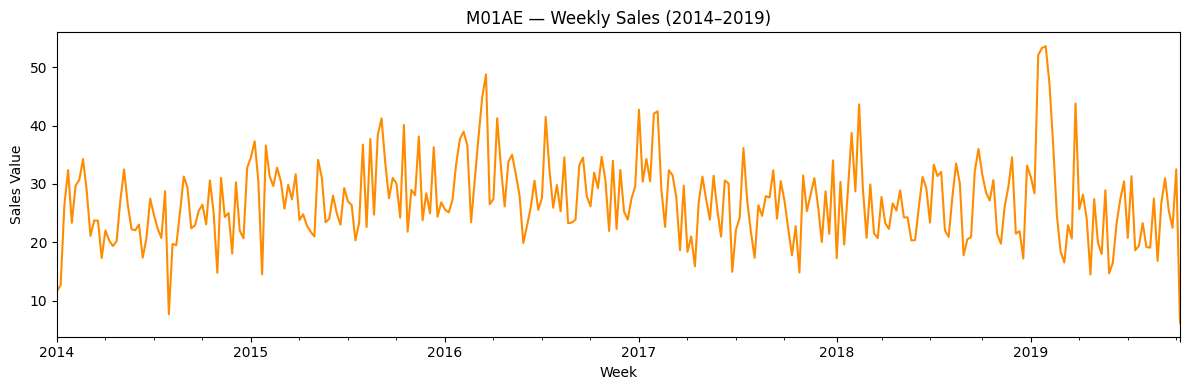

In [13]:
plt.figure(figsize=(12, 4))
df["M01AE"].plot(color="darkorange")
plt.title("M01AE — Weekly Sales (2014–2019)")
plt.xlabel("Week")
plt.ylabel("Sales Value")
plt.tight_layout()
plt.show()

**Insights**

- M01AE displays stable dynamics with occasional short-term fluctuations.  
- The distribution of peaks appears irregular, suggesting non-seasonal variability.  
- The overall level remains constant across the years.


## 4. ATC Code: N02BA

The following plot shows weekly sales for N02BA.


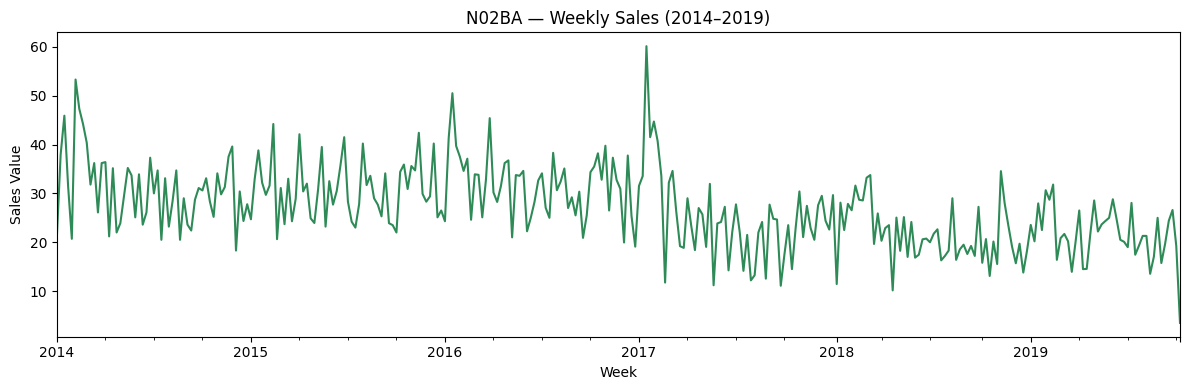

In [14]:
plt.figure(figsize=(12, 4))
df["N02BA"].plot(color="seagreen")
plt.title("N02BA — Weekly Sales (2014–2019)")
plt.xlabel("Week")
plt.ylabel("Sales Value")
plt.tight_layout()
plt.show()

**Insights**

- The N02BA series fluctuates moderately around a stable mean.  
- Periodic small peaks may indicate mild cyclic demand behavior.  
- The low variance makes it suitable for simpler forecasting models.


## 5. ATC Code: N02BE

The following visualization shows the dominant series, N02BE.


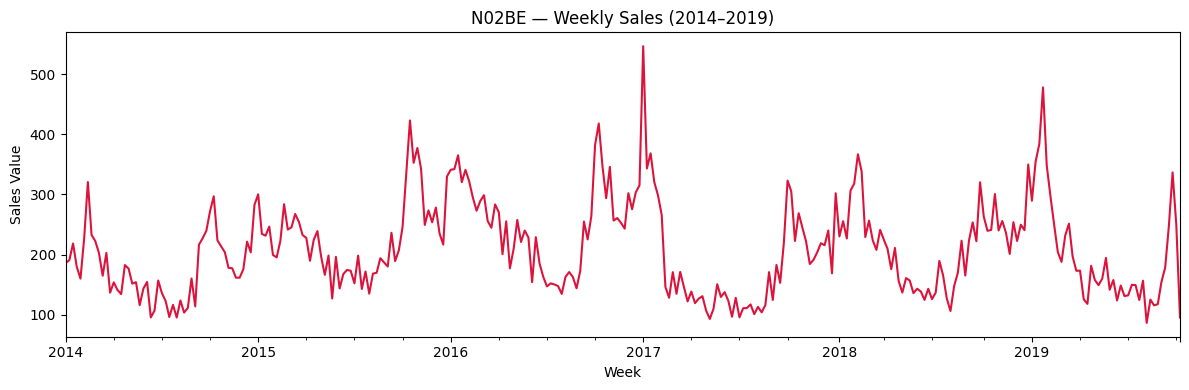

In [15]:
plt.figure(figsize=(12, 4))
df["N02BE"].plot(color="crimson")
plt.title("N02BE — Weekly Sales (2014–2019)")
plt.xlabel("Week")
plt.ylabel("Sales Value")
plt.tight_layout()
plt.show()

**Insights**

- N02BE has the highest sales magnitude among all categories.  
- Strong recurring peaks indicate seasonality — roughly one cycle per year.  
- High amplitude variation suggests sensitivity to external or seasonal factors.  
- The structure of the series makes it a good candidate for seasonal forecasting models.


## 6. ATC Code: N05B

The chart below shows the weekly time series for N05B.


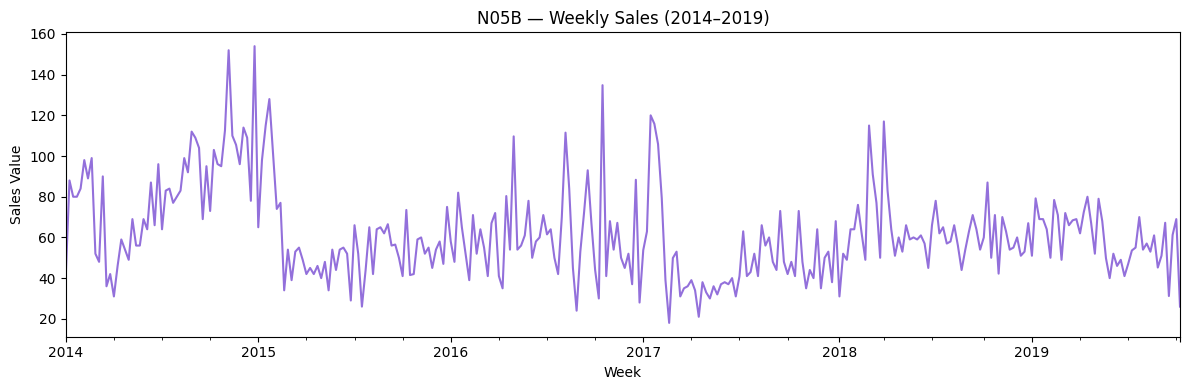

In [16]:
plt.figure(figsize=(12, 4))
df["N05B"].plot(color="mediumpurple")
plt.title("N05B — Weekly Sales (2014–2019)")
plt.xlabel("Week")
plt.ylabel("Sales Value")
plt.tight_layout()
plt.show()

**Insights**

- The N05B series shows low-frequency fluctuations with moderate volatility.  
- There is no strong trend component, and variability is relatively uniform over time.  
- The signal appears stationary, which simplifies statistical modeling.


## 7. ATC Code: N05C

Below is the weekly evolution of N05C.


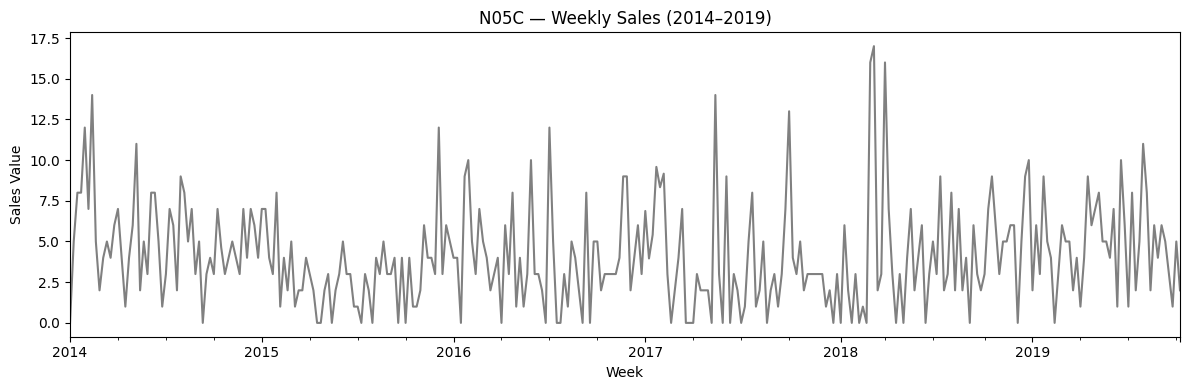

In [17]:
plt.figure(figsize=(12, 4))
df["N05C"].plot(color="gray")
plt.title("N05C — Weekly Sales (2014–2019)")
plt.xlabel("Week")
plt.ylabel("Sales Value")
plt.tight_layout()
plt.show()

**Insights**

- The N05C series operates at low sales levels with irregular spikes.  
- These spikes are not periodic, suggesting short-term market events or data noise.  
- Low mean and high relative variance indicate potential sparsity in the data.


## 8. ATC Code: R03

The chart below illustrates weekly sales for R03.


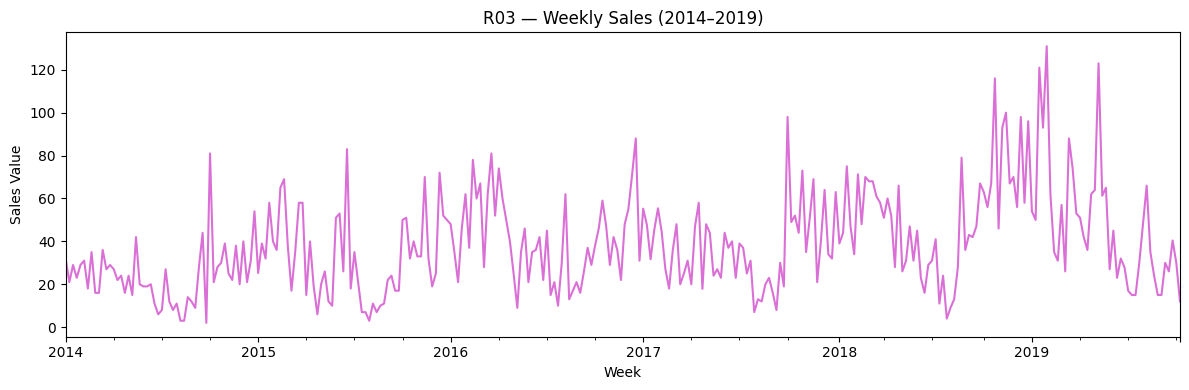

In [18]:
plt.figure(figsize=(12, 4))
df["R03"].plot(color="orchid")
plt.title("R03 — Weekly Sales (2014–2019)")
plt.xlabel("Week")
plt.ylabel("Sales Value")
plt.tight_layout()
plt.show()

**Insights**

- R03 shows recurring peaks that appear approximately once per year.  
- These cycles indicate seasonality and may align with environmental or demand-driven factors.  
- Volatility increases during peak periods, which could impact forecast uncertainty.


## 9. ATC Code: R06

The next chart shows weekly sales for R06.


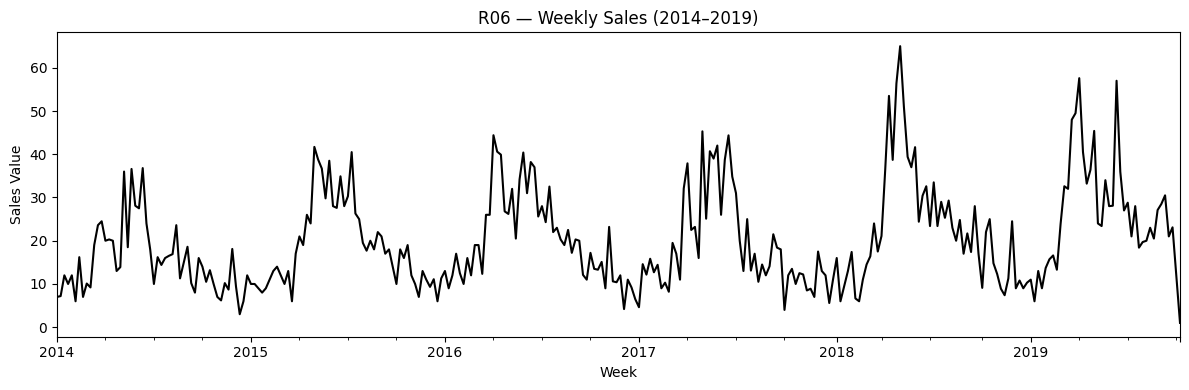

In [19]:
plt.figure(figsize=(12, 4))
df["R06"].plot(color="black")
plt.title("R06 — Weekly Sales (2014–2019)")
plt.xlabel("Week")
plt.ylabel("Sales Value")
plt.tight_layout()
plt.show()

**Insights**

- R06 displays moderate seasonality and small amplitude peaks.  
- The series has stable mean and low variability.  
- Suitable for basic univariate forecasting methods with minimal preprocessing.


## 10. Correlation Analysis Across ATC Categories

The heatmap below shows pairwise Pearson correlations among ATC categories.


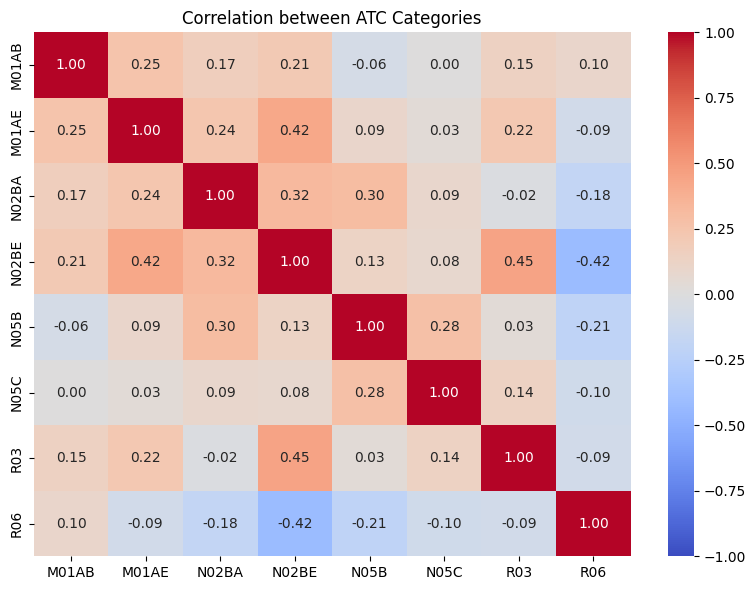

In [20]:
corr = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation between ATC Categories")
plt.tight_layout()
plt.show()

### Quick Statistical Overview

To complement the visual analysis, the following table summarizes the main descriptive statistics for each ATC category.  
This helps validate relative magnitude and variability observed in the plots.


In [22]:
import pandas as pd

summary = df.describe().T
summary["cv"] = (summary["std"] / summary["mean"]).round(2)
styled_summary = (
    summary[["mean", "std", "cv", "min", "max"]]
    .round(2)
    .style.background_gradient(cmap="Blues")
)
styled_summary

,mean,std,cv,min,max
M01AB,35.100000,8.620000,0.250000,7.670000,65.330000
M01AE,27.170000,7.040000,0.260000,6.240000,53.570000
N02BA,27.060000,8.090000,0.300000,3.500000,60.120000
N02BE,208.630000,76.070000,0.360000,86.250000,546.900000
N05B,61.740000,22.440000,0.360000,18.000000,154.000000
N05C,4.140000,3.130000,0.760000,0.000000,17.000000
R03,38.440000,22.900000,0.600000,2.000000,131.000000
R06,20.220000,11.380000,0.560000,1.000000,65.000000


**Observation**

- The coefficient of variation (`cv`) confirms that `N02BE` has the highest relative variability.  
- `N05C` and `R06` show smaller absolute values but higher relative fluctuations.  
- Most other categories are stable, supporting the earlier visual findings of consistent weekly demand patterns.


**Insights**

- Most categories show weak to moderate correlations (0.2–0.4 range).  
- A few stronger pairs may share similar temporal structures, indicating common influencing factors.  
- Overall, low correlation values suggest that individual ATC series can be modeled independently.


<h1 align="center">Summary</h1>


- The dataset shows clear differences in sales magnitude and volatility across ATC categories.  
- Some series (e.g., N02BE, R03) exhibit noticeable seasonality, while others remain flat and stationary.  
- Correlation analysis confirms low interdependence, implying independent modeling strategies.  
- The cleaned and analyzed dataset is ready for feature engineering and forecasting model design.
